<a href="https://colab.research.google.com/github/g40rgeLE/test_tasks/blob/main/test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Для начала выгрузим данные и посмотрим на них:

In [27]:
from google.colab import files
files.upload()

{}

In [30]:
data_path = '/content/train.csv'
data = pd.read_csv(data_path)
df = data.copy(deep=True)
df.tail()

,ID,Order Date,Class,Region,Sub-Category,Sales
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"
9799,7981,03/01/2015,Стандарт,Урал,Paper,"11726,47"


In [31]:
df.dtypes

,0
ID,int64
Order Date,object
Class,object
Region,object
Sub-Category,object
Sales,object


Как видно из значения типов данных сверху, у нас есть следующие поля:

* ID: int64 - идентификатор записи;
* Order Date - дата совершения покупки;
* Class: str - категориальная переменная, класс товара;
* Region: str - категориальная переменная, регион/город совершения покупки;
* Sub-Category - категориальная переменная, категория товара;
* Sales: float64 - объем продаж.

Для начала нам необходимо выставить правильный тип данных полю *Sales*. Для этого нам также необходимо заменить все разделитель дробной части с запятой на точку.

In [38]:
df['Sales'] = data['Sales'].apply(lambda s: s.replace(',', '.')).astype('float64')
print(f'df.Sales.dtype = {df.Sales.dtype}')
df.head()

df.Sales.dtype = float64


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13


Также нам необходимо подготовить столбец с датой, чтобы в дальнейшем с ним было комфортно работать.

In [39]:
df['Order Date'] = pd.to_datetime(data['Order Date'],
                                  format='%d/%m/%Y')
print(f'df["Order Date"].dtype = {df["Order Date"].dtype}')
df.head()

df["Order Date"].dtype = datetime64[ns]


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13


Перейдем к выполнению заданий:

**Задание 1**

 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

 б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

 в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

 Подгруппа – Sub-Category

 Дата – Order_date

 Сделать вывод на основе полученных результатов.


In [65]:
today = df['Order Date'].max() #выберем как реперную точку для отсчета времени
print('Дата полсденей записи о продаже: ' + str(today), end='\n\n')

firstday = df['Order Date'].min()
print('Дата первой записи о продаже: ' + str(firstday), end='\n\n')

''' n - параметр, который задает необходимое количество подгрупп '''
n = 4
#подгруппы с наибольшей частотой покупки за все время продаж
best_sales_alltimes = df['Sub-Category'].value_counts(normalize=True)\
                                        .sort_values(ascending=False)

print('Подгруппы товаров, которые наиболее часто покупают за все время продаж:')
print(best_sales_alltimes.head(n), end='\n\n')

'''
Создадим вспомогательный столбец, который будет содержать информацию о сроке
давности покупки в годах (относительно даты, записанной в today)
'''

df['YDelta'] = (today - df['Order Date']).dt.days / 365

#подгруппы с наибольшей частотой покупки за последние 2 года
best_sales_last2y = df[df['YDelta'] <= 2.]['Sub-Category']\
                        .value_counts(normalize=True)\
                        .sort_values(ascending=False)

print('Подгруппы товаров, которые наиболее часто покупают за последние два года:')
print(best_sales_last2y.head(n), end='\n\n')

#подгруппы с наибольшей частотой покупки за последний год
best_sales_last1y = df[df['YDelta'] <= 1.]['Sub-Category']\
                        .value_counts(normalize=True)\
                        .sort_values(ascending=False)
print('Подгруппы товаров, которые наиболее часто покупают за последний год:')
print(best_sales_last1y.head(n), end='\n\n')

Дата полсденей записи о продаже: 2018-12-30 00:00:00

Дата первой записи о продаже: 2015-01-03 00:00:00

Подгруппы товаров, которые наиболее часто покупают за все время продаж:
Sub-Category
Binders        0.152245
Paper          0.136531
Furnishings    0.095000
Phones         0.089388
Name: proportion, dtype: float64

Подгруппы товаров, которые наиболее часто покупают за последние два года:
Sub-Category
Binders        0.156164
Paper          0.139463
Furnishings    0.096074
Phones         0.087982
Name: proportion, dtype: float64

Подгруппы товаров, которые наиболее часто покупают за последний год:
Sub-Category
Binders        0.151543
Paper          0.138711
Furnishings    0.094714
Phones         0.088909
Name: proportion, dtype: float64



**Выводы (задание 1):** во всех пунктах задания мы получаем, что чаще всего покупают товары из подкатегорий 'Binders', 'Paper', 'Furnishings', 'Phones' (в порядке убывания частоты покупки). Для наглядности построим три barplot'а для всех подкатегорий.

Text(0.5, 0.98, 'Сравнение частоты продаж по 3 разным временным интервалам')

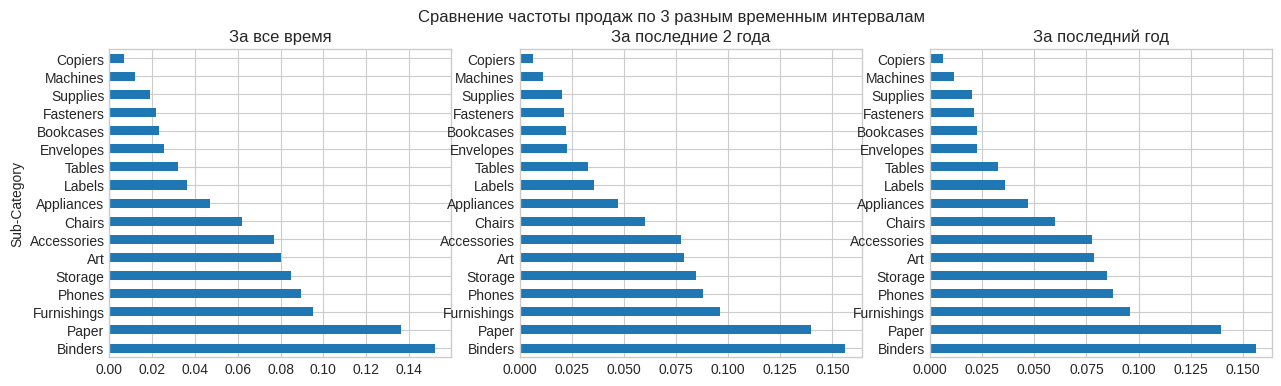

In [72]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 4))

#первый график
plt.subplot(1, 3, 1)
plt.title('За все время')
best_sales_alltimes.plot.barh()

#первый график
plt.subplot(1, 3, 2)
plt.title('За последние 2 года')
best_sales_last2y.plot.barh()
plt.ylabel('')

#первый график
plt.subplot(1, 3, 3)
plt.title('За последний год')
best_sales_last2y.plot.barh()
plt.ylabel('')

plt.suptitle('Сравнение частоты продаж по 3 разным временным интервалам')

 **Задание 2**

 Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.


Baseline


<Axes: ylabel='Sales'>

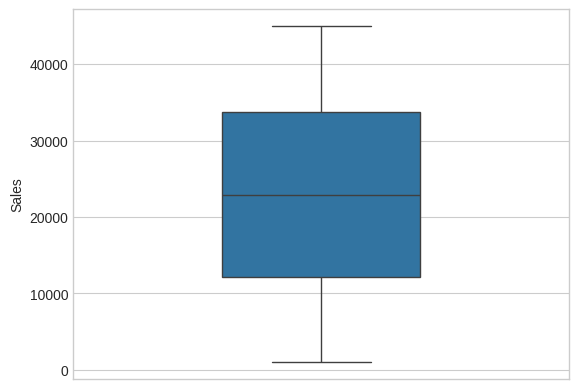

In [79]:
'''
Построим в качестве бейзлайна ящик с усами на основе всех данных,
которые включают выбросы
'''

print('Baseline')
sns.boxplot(data=df, y='Sales', width=0.4)

При изучении полученного ящика с усами, мы можем сделать вывод, что у нас нет таких точек, которые лежали бы дальше 1.5 * IQR расстояния от оснований ящика (Q1 и Q3 соответсвенно). При этом складывается впечатление, что распределение не имеет скосов, т.е. является симметричным. Для более детального изучения распределения Sales, построим гистрограмму.

<Axes: xlabel='Sales', ylabel='Probability'>

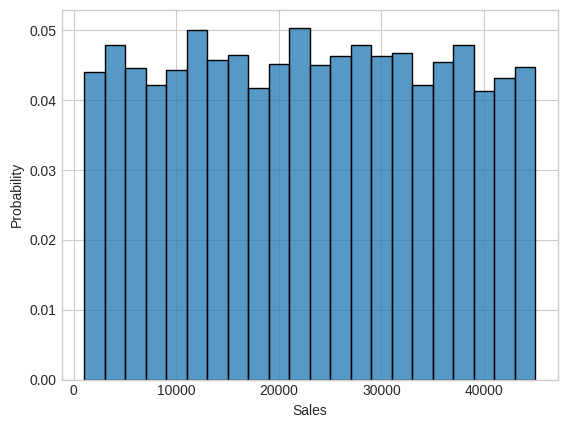

In [85]:
sns.histplot(data=df, x='Sales', stat='probability')

Теперь мы видим, что распределение величины продаж похожо на равномерное и явных выбросов тут не имеется. Мы можем почистить данные от выбросов (как это просят в задании) на основе правила 3-сигм или на основе z-оценки (по сути одно и то же).

Считаем z-оценку, если она по модулю больше 3, то такое значение мы отбрасываем.

In [97]:
df['ZSales'] = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()
df_clean = df[df['ZSales'].abs() <= 3]

<Axes: xlabel='ZSales', ylabel='Probability'>

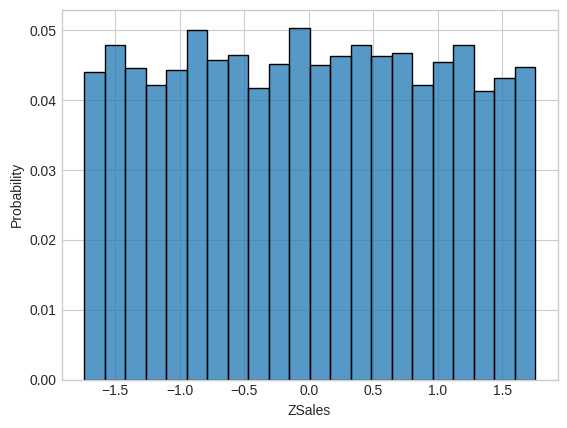

In [98]:
sns.histplot(data=df, x='ZSales', stat='probability')

**Выводы (задание 2):** как можно видеть из диаграмм, приведенных выше, данные поля Sales не содержат выбросов. При этом они лежат в пределах 2 сигм относительно центрального положения распределения данных. Распределение похоже на равномерное, что демонстрирует нам boxplot и построенная гистограмма.

**Задание 3**

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales.

Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


In [103]:
'''
Введем категориальную переменную Sale_group, она будем принимать
5 значений:
XS - очень маленькие продажи (z-оценка меньше -1.5)
S - маленькие продажи (z-оценка больше -1.5, но меньше -1.0)
M - средние продажи (z-оценка между -1.0 и 1.0)
L - большие продажи (z-оценка больше 1.0, но меньше 1.5)
XL - очень большие продажи (z-оценка больше 1.5)
'''
def cut_split(z):
    if z <= -1.5:
        return 'XS'
    elif -1.5 < z <= -1.0:
        return 'S'
    elif -1.0 < z <= 1.0:
        return 'M'
    elif 1.0 < z <= 1.5:
        return 'L'
    elif z > 1.5:
        return 'XL'

df['Sale_group'] = df['ZSales'].apply(cut_split)
df['Sale_group'].value_counts()

,count
Sale_group,
M,5715
L,1377
S,1369
XL,685
XS,654


In [120]:
grouped_df = df.groupby(['Region', 'Sale_group'])
total_sales = grouped_df['Sales'].agg(['sum'])
total_sales['sum'] /= 1e6
total_sales.rename(columns={'sum': 'Total Sales, 1e6'}, inplace=True)
total_sales

Total Sales, 1e6
Region      Sale_group                  
Владивосток L                  15.599720
            M                  36.315715
            S                   2.813025
            XL                  8.748094
            XS                  0.476133
Калиниград  L                  15.959576
            M                  42.763259
            S                   3.075177
            XL                  9.655420
            XS                  0.476868
Москва      L                   9.624434
            M                  20.928687
            S                   1.600603
            XL                  4.458904
            XS                  0.279024
Урал        L                  11.965710
            M                  30.438484
            S                   2.175253
            XL                  6.866820
            XS                  0.412321

**Выводы (задание 3):** Из полученной сводной таблицы видно, что самой выгодной группой является Калининград-M, то есть продажа товаров средней ценовой категории в Калининграде. Также из той же таблицы видно, что по остальным группам продаж Калининград впереди всех.

In [121]:
total_sales_count = grouped_df['Sales'].agg(['sum', 'count'])

In [124]:
total_sales_count['average_check'] = total_sales_count['sum'] / total_sales_count['count']
total_sales_count

sum  count  average_check
Region      Sale_group                                    
Владивосток L           1.559972e+07    405   38517.825951
            M           3.631572e+07   1585   22912.123262
            S           2.813025e+06    402    6997.574915
            XL          8.748094e+06    201   43522.855622
            XS          4.761329e+05    192    2479.858901
Калиниград  L           1.595958e+07    412   38736.835073
            M           4.276326e+07   1877   22782.769616
            S           3.075177e+06    437    7037.018995
            XL          9.655420e+06    223   43297.846951
            XS          4.768679e+05    191    2496.690743
Москва      L           9.624434e+06    249   38652.346506
            M           2.092869e+07    912   22948.121447
            S           1.600603e+06    225    7113.791058
            XL          4.458904e+06    103   43290.325340
            XS          2.790240e+05    109    2559.852991
Урал        L           1.196571e+07    311   38474.951897
            M           3.043848e+07   1341   22698.347554
            S           2.175253e+06    305    7131.977036
            XL          6.866820e+06    158   43460.885506
            XS          4.123207e+05    162    2545.189383